# Base de dados

Baixem a base de dados de [recorded mundiais](https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/worldRecords.csv) e coloquem o arquivo na mesma pasta que este notebook

Vamos utilizar [pandas](https://pandas.pydata.org/) para processamento de dados e [matplotlib](https://matplotlib.org/) para plotar gráficos


In [1]:
import pandas as pd

In [2]:
pd.__version__

'1.0.1'

In [3]:
link = "https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/worldRecords.csv"
df = pd.read_csv(filepath_or_buffer=link)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.head()

,Unnamed: 0,Distance,roadORtrack,Place,Time,Date
0,1,0.10,track,Athens,0.162833,2005-06-14
1,2,0.15,track,Cassino,0.246667,1983-05-22
2,3,0.20,track,Atlanta,0.322000,1996-08-01
3,4,0.30,track,Pretoria,0.514167,2000-03-24
4,5,0.40,track,Seville,0.719667,1999-08-26


In [7]:
df.tail()

,Unnamed: 0,Distance,roadORtrack,Place,Time,Date
35,36,32.180,road,Chicago,95.366667,1985-10-20
36,37,50.000,road,Claremont-Kirstenbosch,163.633333,1988-04-12
37,38,100.000,road,Lake Saroma,373.550000,1998-06-21
38,39,160.900,road,New York,706.616667,1984-05-08
39,40,290.221,road,Basle,1440.000000,1998-05-03


In [10]:
# selecionar colunas
place = df["Place"].head()
place

0      Athens
1     Cassino
2     Atlanta
3    Pretoria
4     Seville
Name: Place, dtype: object

In [11]:
type(place)

pandas.core.series.Series

In [14]:
# selecionar colunas
# lista das colunas que eu desejo selecionar
lista_colunas = ["Place", "Time"]
df[lista_colunas].head()

,Place,Time
0,Athens,0.162833
1,Cassino,0.246667
2,Atlanta,0.322000
3,Pretoria,0.514167
4,Seville,0.719667


In [15]:
df.describe()

,Unnamed: 0,Distance,Time
count,40.000000,40.000000,40.000000
mean,20.500000,32.112725,125.179650
std,11.690452,57.754637,270.567770
min,1.000000,0.100000,0.162833
25%,10.750000,1.581750,3.647458
50%,20.500000,10.000000,26.662750
75%,30.250000,30.000000,88.328333
max,40.000000,290.221000,1440.000000


In [17]:
time = df["Time"]
time.head()

0    0.162833
1    0.246667
2    0.322000
3    0.514167
4    0.719667
Name: Time, dtype: float64

In [19]:
max_time = time.max()

In [21]:
linha_com_max_time = df[df["Time"] == max_time]
linha_com_max_time

,Unnamed: 0,Distance,roadORtrack,Place,Time,Date
39,40,290.221,road,Basle,1440.0,1998-05-03


In [24]:
place_com_max_time = df.loc[df["Time"] == max_time, "Place"]
place_com_max_time

39    Basle
Name: Place, dtype: object

In [40]:
cidade_a_selecionar = "Chicago"
linha_chicago = df[df["Place"] == cidade_a_selecionar]
linha_chicago

,Unnamed: 0,Distance,roadORtrack,Place,Time,Date,Speed
35,36,32.18,road,Chicago,95.366667,1985-10-20,0.337434


In [28]:
df["Speed"] = df["Distance"] / df["Time"]

In [29]:
df.head()

,Unnamed: 0,Distance,roadORtrack,Place,Time,Date,Speed
0,1,0.10,track,Athens,0.162833,2005-06-14,0.614125
1,2,0.15,track,Cassino,0.246667,1983-05-22,0.608108
2,3,0.20,track,Atlanta,0.322000,1996-08-01,0.621118
3,4,0.30,track,Pretoria,0.514167,2000-03-24,0.583468
4,5,0.40,track,Seville,0.719667,1999-08-26,0.555813


In [30]:
df.to_csv("recordes_mundiais.csv")

In [32]:
group = df.groupby("roadORtrack")
group

In [34]:
road_or_track = group["Distance"].count()
road_or_track

roadORtrack
road     16
track    24
Name: Distance, dtype: int64

In [25]:
import matplotlib.pyplot as plt

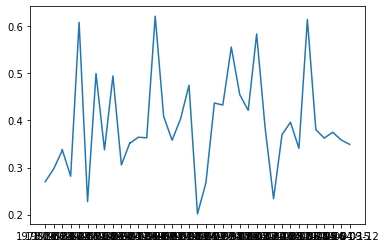

In [37]:
recordes_ordenados = df.sort_values("Date")
plt.plot(recordes_ordenados["Date"], recordes_ordenados["Speed"])

<BarContainer object of 2 artists>

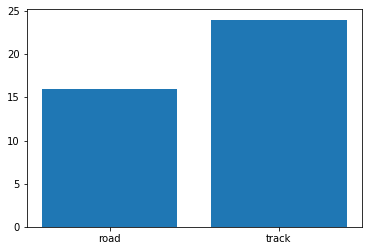

In [35]:
plt.bar(x=["road", "track"], height=road_or_track)

(array([29.,  5.,  1.,  2.,  0.,  2.,  0.,  0.,  0.,  1.]),
 array([1.000000e-01, 2.911210e+01, 5.812420e+01, 8.713630e+01,
        1.161484e+02, 1.451605e+02, 1.741726e+02, 2.031847e+02,
        2.321968e+02, 2.612089e+02, 2.902210e+02]),
 <a list of 10 Patch objects>)

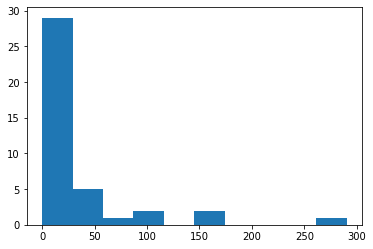

In [26]:
plt.hist(df["Distance"])

# Análise de dados

Usando sqlite3 e scikit-learn.

Desafio: construa uma heurística que receba como input os atributos da flores iris e retorne a espécie da iris.

In [53]:
import pandas as pd
from sklearn.datasets import load_iris

# load data
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame({"iris": iris.target})
y.loc[:, "iris"] = y["iris"].apply(lambda x: iris.target_names[x])
df = pd.concat([X, y], axis=1)
# resampling
df = df.sample(frac=1).sample(frac=1).reset_index(drop=True).reset_index().rename(columns={"index": "id"})
# splitting
test = df[:15].copy()
test_answers = test[["id", "iris"]]
del test["iris"]
valid = df[15:45].copy()
train = df[45:].copy()
# dump to database
conn = sqlite3.connect("iris.sqlite")
test.to_sql(name="test", con=conn, if_exists="replace", index=False)
test_answers.to_sql(name="test_answers", con=conn, if_exists="replace", index=False)
valid.to_sql(name="valid", con=conn, if_exists="replace", index=False)
train.to_sql(name="train", con=conn, if_exists="replace", index=False)
conn.close()

C:\Users\jayme.anchante\Anaconda3\lib\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [54]:
import sqlite3
import pandas as pd

In [55]:
conexao = sqlite3.connect("iris.sqlite")
conexao

In [56]:
tabelas_existentes = pd.read_sql(
    sql="SELECT * FROM sqlite_master",
    con=conexao)
tabelas_existentes

,type,name,tbl_name,rootpage,sql
0,table,test,test,2,"CREATE TABLE ""test"" (\n""id"" INTEGER,\n ""sepal..."
1,table,test_answers,test_answers,7,"CREATE TABLE ""test_answers"" (\n""id"" INTEGER,\n..."
2,table,valid,valid,3,"CREATE TABLE ""valid"" (\n""id"" INTEGER,\n ""sepa..."
3,table,train,train,4,"CREATE TABLE ""train"" (\n""id"" INTEGER,\n ""sepa..."


In [59]:
test.shape

(15, 5)

In [64]:
"""
SELECT train.iris,
FROM train
INNER JOIN test
ON
    train.sepal length (cm) = test.sepal length (cm) AND
    train.sepal width (cm) = test.sepal width (cm) AND
    train.petal length (cm) = test.petal length (cm) AND
    train.petal width (cm) = test.petal width (cm)
"""
pd.merge(train, test, on=[
    "sepal length (cm)", "sepal width (cm)",
    "petal length (cm)", "petal width (cm)"],
         how="inner")

,id_x,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris,id_y


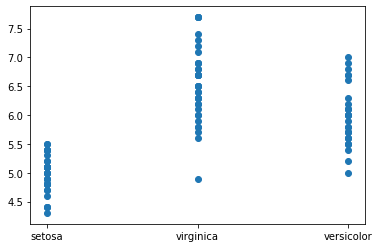

In [67]:
plt.scatter(train["iris"], train["sepal length (cm)"])

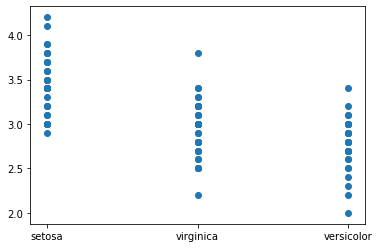

In [68]:
plt.scatter(train["iris"], train["sepal width (cm)"])

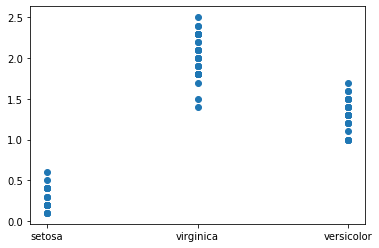

In [69]:
plt.scatter(train["iris"], train["petal width (cm)"])

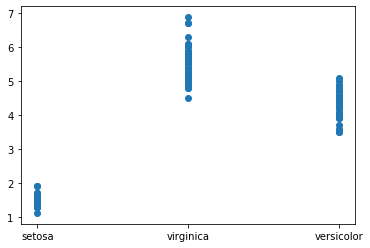

In [70]:
plt.scatter(train["iris"], train["petal length (cm)"])

In [57]:
train = pd.read_sql(sql="SELECT * FROM train", con=conexao)
test = pd.read_sql(sql="SELECT * FROM test", con=conexao)
train.head(), test.head()

(   id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
 0  45                5.3               3.7                1.5   
 1  46                7.7               2.6                6.9   
 2  47                6.5               3.0                5.2   
 3  48                6.0               2.7                5.1   
 4  49                7.2               3.2                6.0   
 
    petal width (cm)        iris  
 0               0.2      setosa  
 1               2.3   virginica  
 2               2.0   virginica  
 3               1.6  versicolor  
 4               1.8   virginica  ,
    id  sepal length (cm)  sepal width (cm)  petal length (cm)  \
 0   0                6.3               2.8                5.1   
 1   1                5.0               3.5                1.3   
 2   2                5.0               3.3                1.4   
 3   3                6.2               2.2                4.5   
 4   4                5.1               2.5                3.